# Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 500)

# Import data

In [2]:
payment_df = pd.read_csv('../data/original_data/olist_order_payments_dataset.csv') 
delivered_df = pd.read_csv('../data/processed_data/olist_delivered_customers.csv') 

# Overview data

**Overview payment_df**

In [3]:
print('Shape:', payment_df.shape)
payment_df.head()

Shape: (103886, 5)


,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [4]:
# Check null values of 'payment_df'
payment_df.isnull().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [5]:
# Filter delivered orders
delivered_payment_df = payment_df[payment_df.order_id.isin(delivered_df.order_id)]
print('Shape:', delivered_payment_df.shape)
delivered_payment_df.head()

Shape: (100756, 5)


,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [6]:
# Describe 'delivered_payment_df'
delivered_payment_df.describe()

,payment_sequential,payment_installments,payment_value
count,100756.000000,100756.000000,100756.000000
mean,1.088372,2.851632,153.067428
std,0.652729,2.684378,214.451418
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.780000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.290000
max,26.000000,24.000000,13664.080000


**Overview delivered_df**

In [7]:
print('Shape:', delivered_df.shape)
delivered_df.head()

Shape: (96478, 17)


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,customer_country,geolocation_lat,geolocation_lng,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,total_number_of_items,total_order_value
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,Brazil,-20.502070,-47.396822,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,1,146.87
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,Brazil,-23.727299,-46.542631,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,1,335.48
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,Brazil,-23.531294,-46.656404,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,1,157.73
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,Brazil,-23.497390,-46.182342,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,1,173.30
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,Brazil,-22.973309,-47.141530,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,1,252.25


In [8]:
# Check null values of 'delivered_df'
delivered_df.isnull().sum()

customer_id                       0
customer_unique_id                0
customer_zip_code_prefix          0
customer_city                     0
customer_state                    0
customer_country                  0
geolocation_lat                   0
geolocation_lng                   0
order_id                          0
order_status                      0
order_purchase_timestamp          0
order_approved_at                14
order_delivered_carrier_date      2
order_delivered_customer_date     0
order_estimated_delivery_date     0
total_number_of_items             0
total_order_value                 0
dtype: int64

In [9]:
# Convert some columns below to datetime
delivered_df['order_purchase_timestamp'] = pd.to_datetime(delivered_df.order_purchase_timestamp, errors='coerce')
delivered_df['order_approved_at'] = pd.to_datetime(delivered_df.order_approved_at, errors='coerce')
delivered_df['order_delivered_carrier_date'] = pd.to_datetime(delivered_df.order_delivered_carrier_date, errors='coerce')
delivered_df['order_delivered_customer_date'] = pd.to_datetime(delivered_df.order_delivered_customer_date, errors='coerce')
delivered_df['order_estimated_delivery_date'] = pd.to_datetime(delivered_df.order_estimated_delivery_date, errors='coerce')

In [10]:
# Check data types of 'delivered_df'
delivered_df.dtypes

customer_id                              object
customer_unique_id                       object
customer_zip_code_prefix                  int64
customer_city                            object
customer_state                           object
customer_country                         object
geolocation_lat                         float64
geolocation_lng                         float64
order_id                                 object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
total_number_of_items                     int64
total_order_value                       float64
dtype: object

# Payment analysis

## Payment sequential

**Note:** A customer can pay for an order using multiple payment methods. Then payment sequential is generated. Below is a table to calculate the number of orders according to payment sequential.

In [11]:
# Calculate number of orders and percentage of payment sequential
temp_payment_sequential_df = delivered_payment_df.groupby(['order_id']).agg({'payment_sequential':'max'}).reset_index()
payment_sequential_df = temp_payment_sequential_df.groupby('payment_sequential').agg({'order_id':'nunique'}).reset_index().rename(columns={'order_id':'number_of_orders'})
payment_sequential_df['percentage'] = round(payment_sequential_df['number_of_orders'] / payment_sequential_df['number_of_orders'].sum() * 100, 2)
print('Shape:', payment_sequential_df.shape)
payment_sequential_df.head()

Shape: (19, 3)


,payment_sequential,number_of_orders,percentage
0,1,93526,96.94
1,2,2387,2.47
2,3,297,0.31
3,4,104,0.11
4,5,52,0.05


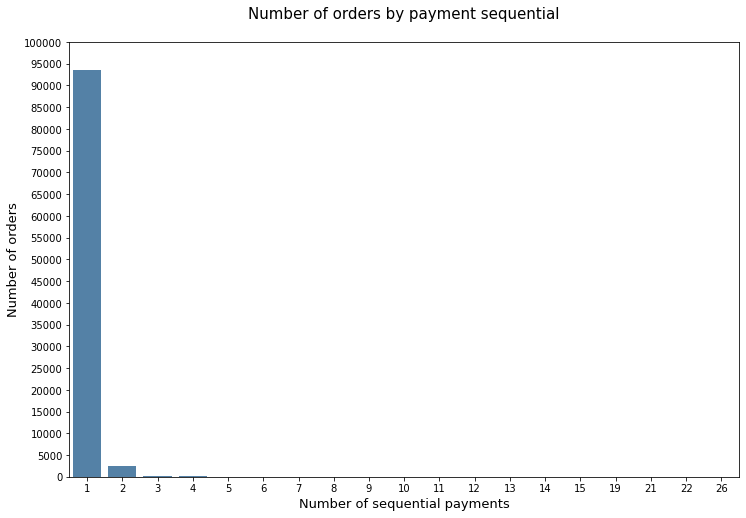

In [12]:
# Visualize number of orders by payment sequential
fig, ax = plt.subplots(figsize=(12, 8))
sns.barplot(y='number_of_orders', x='payment_sequential', data=payment_sequential_df, color='steelblue', ax=ax)
ax.set_title('Number of orders by payment sequential\n', fontsize=15)
ax.set_xlabel('Number of sequential payments', fontsize=13)
ax.set_ylabel('Number of orders', fontsize=13)
ax.set_yticks(np.arange(0, 105000, 5000))
plt.show()

**Comment:** There are orders with up to 26 payment sequential. However, for the most part, up to 96.94% of customers only pay once.

## Payment type

In [13]:
delivered_payment_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [14]:
# Calculate number of oders by payment type 
payment_type_df = delivered_payment_df.groupby('payment_type').size().sort_values(ascending=False).to_frame().rename(columns={0:'number_of_orders'})
payment_type_df

,number_of_orders
payment_type,
credit_card,74586
boleto,19191
voucher,5493
debit_card,1486


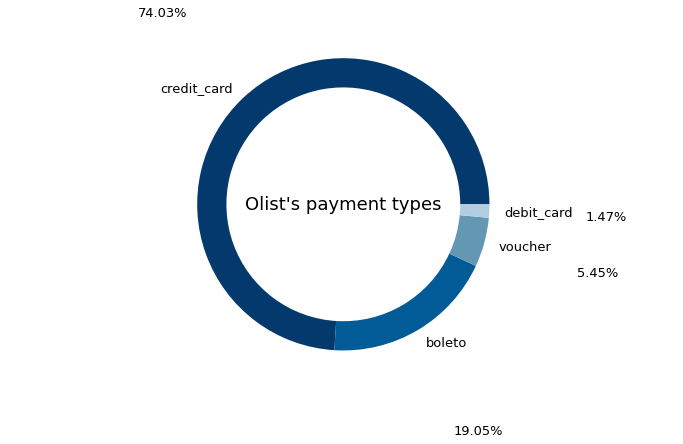

In [15]:
# Visualize Olit's review score using donut chart
colors=['#03396c', '#005b96', '#6497b1', '#b3cde0']
plt.figure(figsize=(12, 6))
plt.pie(payment_type_df['number_of_orders'], autopct='%.2f%%', pctdistance=1.8, wedgeprops=dict(width=0.2), textprops={'fontsize': 13}, colors=colors, labels=payment_type_df.index)
plt.axis('equal') 
plt.text(0., 0., 'Olist\'s payment types', horizontalalignment='center', verticalalignment='center', fontsize=18)
plt.show()

**Comment:** 74.03% - nearly 3/4 of Olist's orders are paid by credit card, a small number 1.47% of orders use debit card, 5.45% of orders use vouchers and 19.05% of orders use boleto - a ticket that can also be understood as a Brazilian form of cash payment. These are good numbers, showing that Olist's customers are familiar with online payments and online purchases.

In [16]:
# Describe of 'payment_sequential' by 'payment_type'
delivered_payment_df.groupby('payment_type')[['payment_sequential']].describe()

payment_sequential                                              
                          count      mean       std  min  25%  50%  75%   max
payment_type                                                                 
boleto                  19191.0  1.000052  0.007219  1.0  1.0  1.0  1.0   2.0
credit_card             74586.0  1.004183  0.064749  1.0  1.0  1.0  1.0   3.0
debit_card               1486.0  1.034320  0.185773  1.0  1.0  1.0  1.0   3.0
voucher                  5493.0  2.554706  2.339876  1.0  1.0  2.0  3.0  26.0

**Comment:** It can be seen that, for orders with a payment sequential number from 4 onwards, customers all use voucher to pay (of course customers can use other payment methods but definitely use voucher).

In [17]:
#  Describe of 'payment_installments' by 'payment_type'
delivered_payment_df.groupby('payment_type')[['payment_installments']].describe()

payment_installments                                             
                            count      mean      std  min  25%  50%  75%   max
payment_type                                                                  
boleto                    19191.0  1.000000  0.00000  1.0  1.0  1.0  1.0   1.0
credit_card               74586.0  3.501314  2.84766  0.0  1.0  3.0  5.0  24.0
debit_card                 1486.0  1.000000  0.00000  1.0  1.0  1.0  1.0   1.0
voucher                    5493.0  1.000000  0.00000  1.0  1.0  1.0  1.0   1.0

In [18]:
# Check data have 'payment_installments'=0:
delivered_payment_df[delivered_payment_df.payment_installments==0] 

,order_id,payment_sequential,payment_type,payment_installments,payment_value
46982,744bade1fcf9ff3f31d860ace076d422,2,credit_card,0,58.69
79014,1a57108394169c0b47d8f876acc9ba2d,2,credit_card,0,129.94


In [19]:
delivered_payment_df[delivered_payment_df.order_id=='744bade1fcf9ff3f31d860ace076d422'] 

,order_id,payment_sequential,payment_type,payment_installments,payment_value
46982,744bade1fcf9ff3f31d860ace076d422,2,credit_card,0,58.69


In [20]:
delivered_payment_df[delivered_payment_df.order_id=='1a57108394169c0b47d8f876acc9ba2d'] 

,order_id,payment_sequential,payment_type,payment_installments,payment_value
79014,1a57108394169c0b47d8f876acc9ba2d,2,credit_card,0,129.94


**Comment:** Data with payment_installments = 0 is unreasonable. Since there are only 2 data like this, we can consider these 2 orders without installments, move payment_installments = 1.

In [21]:
# Replace 'payment_installments' have 0 by 1
delivered_payment_df.payment_installments.replace(0, 1, inplace=True)

In [22]:
# Describe of 'payment_installments' by 'payment_type'
delivered_payment_df.groupby('payment_type')[['payment_installments']].describe()

payment_installments                                          \
                            count      mean       std  min  25%  50%  75%   
payment_type                                                                
boleto                    19191.0  1.000000  0.000000  1.0  1.0  1.0  1.0   
credit_card               74586.0  3.501341  2.847632  1.0  1.0  3.0  5.0   
debit_card                 1486.0  1.000000  0.000000  1.0  1.0  1.0  1.0   
voucher                    5493.0  1.000000  0.000000  1.0  1.0  1.0  1.0   

                    
               max  
payment_type        
boleto         1.0  
credit_card   24.0  
debit_card     1.0  
voucher        1.0

**Comment:** True to reality, only the form of payment by credit card is installment payment.

In [23]:
# Describe of 'payment_installments' by 'payment_type'
tem_cond_payment_value_df = delivered_payment_df.groupby('payment_type')[['payment_value']].describe()
tem_cond_payment_value_df

payment_value                                                \
                     count        mean         std    min    25%     50%   
payment_type                                                               
boleto             19191.0  144.334979  212.953716  11.62  55.43   93.78   
credit_card        74586.0  162.243516  219.209098   0.01  62.08  106.84   
debit_card          1486.0  140.256474  234.661826  13.38  51.18   89.60   
voucher             5493.0   62.445511   90.049239   0.00  18.12   39.04   

                                 
                  75%       max  
payment_type                     
boleto        160.305   7274.88  
credit_card   180.460  13664.08  
debit_card    154.350   4445.50  
voucher        78.280   1839.05

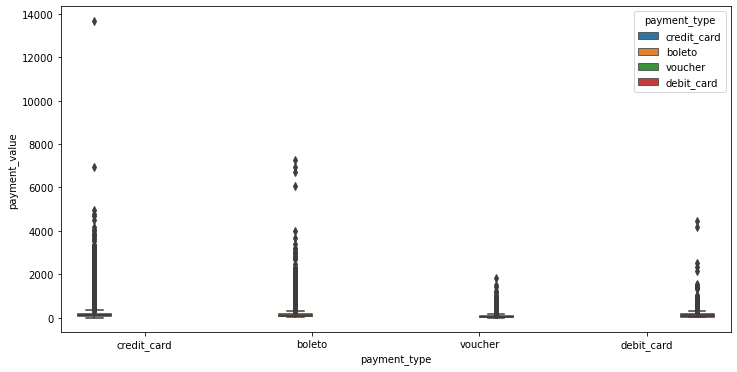

In [24]:
# Visualize boxplot of payment types
plt.figure(figsize=(12,6))
sns.boxplot(x='payment_type', y='payment_value', data=delivered_payment_df, hue='payment_type')
plt.show()

**Comment:** Data has many outliers.

In [25]:
# Calculate condition to filter ouliers of payment types
cond_payment_value_df = pd.DataFrame()
cond_payment_value_df['payment_type'] = tem_cond_payment_value_df.index
cond_payment_value_df['25%'] = tem_cond_payment_value_df[('payment_value','25%')].values
cond_payment_value_df['75%'] = tem_cond_payment_value_df[('payment_value','75%')].values
cond_payment_value_df['iqr'] = cond_payment_value_df['75%'] - cond_payment_value_df['25%']
cond_payment_value_df['upper_limit'] = cond_payment_value_df['75%'] + cond_payment_value_df['iqr'] * 1.5
cond_payment_value_df['lower_limit'] = cond_payment_value_df['25%'] - cond_payment_value_df['iqr'] * 1.5
cond_payment_value_df.set_index('payment_type', inplace=True)
cond_payment_value_df[cond_payment_value_df < 0] = 0
cond_payment_value_df

,25%,75%,iqr,upper_limit,lower_limit
payment_type,,,,,
boleto,55.43,160.305,104.875,317.6175,0.0
credit_card,62.08,180.460,118.380,358.0300,0.0
debit_card,51.18,154.350,103.170,309.1050,0.0
voucher,18.12,78.280,60.160,168.5200,0.0


In [26]:
delivered_payment_df[delivered_payment_df.payment_value < 0]

,order_id,payment_sequential,payment_type,payment_installments,payment_value


**Comment:** There is no data less than 0 (lower_limit), so just check those greater than upper_limit.

In [27]:
# Create dictionary store upper limit of payment type
upper_limit_dict = cond_payment_value_df[['upper_limit']].to_dict()['upper_limit']
print('Upper Limit Dict:', upper_limit_dict)

Upper Limit Dict: {'boleto': 317.6175, 'credit_card': 358.03000000000003, 'debit_card': 309.105, 'voucher': 168.51999999999998}


In [28]:
# Add column 'upper_limit' to 'delivered_payment_df'
delivered_payment_df['upper_limit'] = delivered_payment_df['payment_type'].map(upper_limit_dict)
delivered_payment_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value,upper_limit
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,358.03
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,358.03
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,358.03
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,358.03
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45,358.03


In [29]:
cond = delivered_payment_df.payment_value <= delivered_payment_df.upper_limit

In [30]:
# Create data frame that contains descriptive information about the payment value of the payment types
avg_payment_value_df = delivered_payment_df[cond].groupby('payment_type')[['payment_value']].describe().sort_values(('payment_value', 'mean'), ascending=False)
avg_payment_value_df

payment_value                                              \
                     count        mean        std    min    25%    50%   
payment_type                                                             
credit_card        68769.0  116.827169  75.158142   0.01  58.75  98.71   
boleto             17759.0  104.219814  65.159927  11.62  53.38  86.36   
debit_card          1385.0  101.079487  64.908148  13.38  49.09  83.55   
voucher             5131.0   45.680187  37.971889   0.00  16.70  34.31   

                               
                  75%     max  
payment_type                   
credit_card   158.770  358.03  
boleto        140.325  317.40  
debit_card    138.840  307.46  
voucher        65.645  168.28

**Comment:** Credit card payment has the largest average payout value at `R$` 116.83, followed by boleto at `R$` 104.22, debit_card with `R$` 101.08 and voucher with the lowest average payout value are only R$45.68.

## Payment installments

In [31]:
# Filter out unique orders that pay by credit card along with installments
temp_payment_installments_df = delivered_payment_df[delivered_payment_df.payment_type=='credit_card'].groupby(['order_id']).agg({'payment_installments':'max'}).reset_index()
temp_payment_installments_df

,order_id,payment_installments
0,00010242fe8c5a6d1ba2dd792cb16214,2
1,00018f77f2f0320c557190d7a144bdd3,3
2,000229ec398224ef6ca0657da4fc703e,5
3,00024acbcdf0a6daa1e931b038114c75,2
4,00042b26cf59d7ce69dfabb4e55b4fd9,3
...,...,...
74299,fffb0b1a50e65c449020434fa835e078,1
74300,fffbee3b5462987e66fb49b1c5411df2,3
74301,fffce4705a9662cd70adb13d4a31832d,3
74302,fffe18544ffabc95dfada21779c9644f,3


In [32]:
# Calculate number of orders by payment_installments
payment_installments_df = temp_payment_installments_df.groupby('payment_installments').size().to_frame().rename(columns={0:'number_of_orders'}).reset_index()
print('Shape:', payment_installments_df.shape)
payment_installments_df.head()

Shape: (23, 2)


,payment_installments,number_of_orders
0,1,24643
1,2,12026
2,3,10133
3,4,6864
4,5,5083


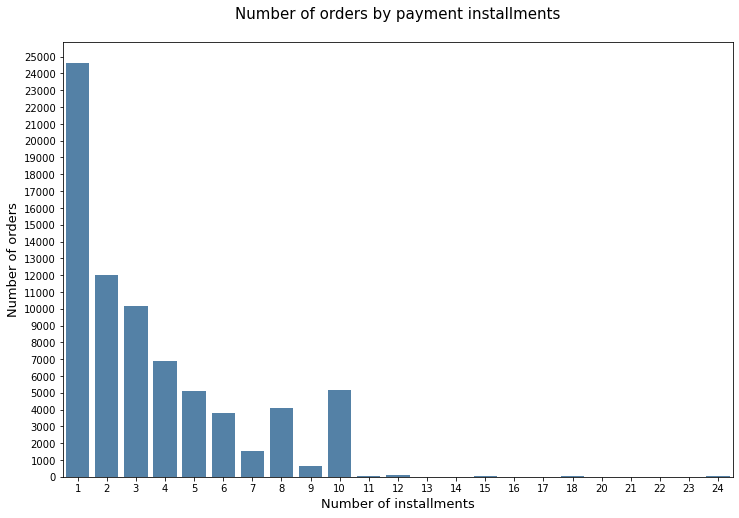

In [33]:
# Visualize number of orders by payment installments
fig, ax = plt.subplots(figsize=(12, 8))
sns.barplot(y='number_of_orders', x='payment_installments', data=payment_installments_df, color='steelblue', ax=ax)
ax.set_title('Number of orders by payment installments\n', fontsize=15)
ax.set_xlabel('Number of installments', fontsize=13)
ax.set_ylabel('Number of orders', fontsize=13)
ax.set_yticks(np.arange(0, 26000, 1000))
plt.show()

**Comment:** In general, the number of orders tends to decrease as the number of installments increases. However, orders with installments of 8 and 10 do not follow that rule. Besides, with payment_installments=1 cannot be counted as installments, only orders with payment_installments>1 will be counted as installments. Below is a pie chart showing the percentage of orders with installment payments out of total credit card payments.

In [34]:
# Calculate the number of orders with installment and without
credit_card_df = pd.DataFrame(index=[0, 1], data={'With installment':['Yes', 'No']})
credit_card_df['Number of orders'] = [payment_installments_df['number_of_orders'][1:].sum(), payment_installments_df['number_of_orders'][0]]
credit_card_df

,With installment,Number of orders
0,Yes,49661
1,No,24643


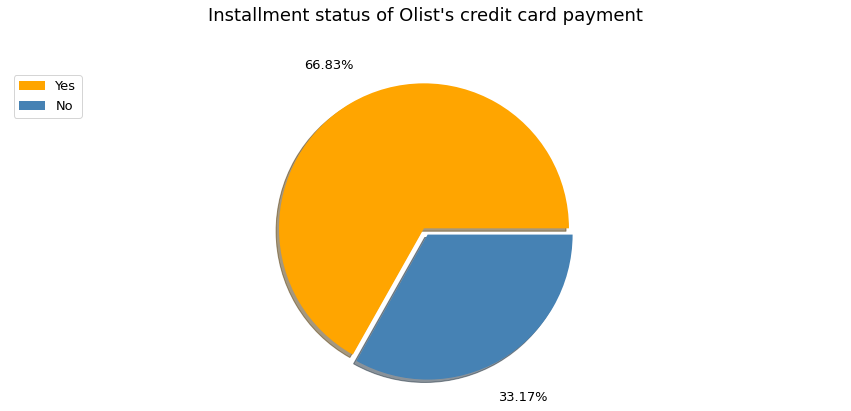

In [35]:
# Visualize order quantity percentage by installment of orders using credit card to pay
plt.figure(figsize=(15, 6))
explode = [0.02, 0.03]
plt.pie(credit_card_df['Number of orders'], explode=explode, autopct='%.2f%%', pctdistance=1.3, textprops={'fontsize': 13}, colors=['orange', 'steelblue'], shadow=True)
plt.title('Installment status of Olist\'s credit card payment\n\n', fontsize=18) 
plt.axis('equal') 
plt.legend(labels=credit_card_df['With installment'], loc='upper left', fontsize=13) 
plt.show()

**Comment:** Out of a total of 74304 orders using credit card payment. Up to 66.83% of orders used the form of installment payment. Besides, with the previous analysis, 74.03% of orders used credit card payment. Thereby, it is possible to predict the existence of a group of customers who tend to spend first and pay later enough for Olist to invest and offer appropriate approach strategies.